Importing libraries

In [1]:
import math
import cProfile
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

Importing classes

In [2]:
#CMAB
from Strategies.LinUCBGlobal              import LinUCBGlobal
from Strategies.RLinUCBGlobal             import RLinUCBGlobal

from Strategies.LinUCB                    import LinUCB
from Strategies.RLinUCB                   import RLinUCB

from Strategies.CLinUCB                   import CLinUCB
from Strategies.RCLinUCB                  import RCLinUCB
#Rewards
from Strategies.Rewards.BernoulliFeature   import BernoulliFeature

Init Parameters

In [3]:
iterations = 1000
experimentos = 100
k = 10
ds = [1,2,4,8,16,32,64,128,256,512]
clusters_amounts = [1,2,4]
alpha = 1
user_amount = 100
max_prob = 0.3
noise = 0.05

lamb = 1

sup_percentile = 75
inf_percentile = 25

Init

In [ ]:
# Run experiments
rTime              = np.zeros((experimentos,len(ds)))
nTime              = np.zeros((experimentos,len(ds)))
# Run experiments
for j in range(len(ds)):
    print('ds: ' + str(j + 1) + '/' + str(len(ds)))
    for i in    range(experimentos):
        d = ds[j]
        aux1 = np.zeros(d)
        aux1[0]=1
        aux2= np.zeros(d)
        aux2[-1] = 1
        best_theta = [aux1, aux2]
        reward_class = BernoulliFeature(k, d,user_amount, max_prob, noise, best_theta)
        print('exp: ' + str(i + 1) + '/' + str(experimentos))

        linucbg        = LinUCBGlobal(k, iterations, reward_class, d, user_amount, alpha, lamb )
        rlinucbg       = RLinUCBGlobal(k, iterations, reward_class, d, user_amount, alpha, lamb )

        nTime[i,j] = timer()
        linucbg.run()
        nTime[i,j] = timer() - nTime[i,j]

        rTime[i,j] = timer()
        rlinucbg.run()
        rTime[i,j] = timer() - rTime[i,j]



In [ ]:
ntime_inf            = np.percentile(nTime,inf_percentile ,axis=0)
ntime_median_rew     = np.median(nTime,axis=0)
ntime_sup            = np.percentile(nTime,sup_percentile ,axis=0)

rTime_g_inf            = np.percentile(rTime,inf_percentile ,axis=0)
rTime_g_median_rew     = np.median(rTime,axis=0)
rTime_g_sup            = np.percentile(rTime,sup_percentile ,axis=0)

In [ ]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(ds, ntime_median_rew,label="Linucb Global", color='blue')
plt.plot(ds, rTime_g_median_rew,label="Linucb recursivo Global", color='green')
ax.fill_between(ds,ntime_sup,ntime_inf, color = 'blue', alpha = transparencia)
ax.fill_between(ds,rTime_g_sup,rTime_g_inf, color = 'green', alpha = transparencia)

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Dimension de d")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo en ejecutarse LinUCB Global variando dimension de d")
#plt.ylim(0,0.1)
plt.show()

LinUCB Individual

In [4]:
# Run experiments
rTime              = np.zeros((experimentos,len(ds)))
nTime              = np.zeros((experimentos,len(ds)))
# Run experiments
for j in range(len(ds)):
    print('ds: ' + str(j + 1) + '/' + str(len(ds)))
    for i in    range(experimentos):
        d = ds[j]
        aux1 = np.zeros(d)
        aux1[0]=1
        aux2= np.zeros(d)
        aux2[-1] = 1
        best_theta = [aux1, aux2]
        reward_class = BernoulliFeature(k, d,user_amount, max_prob, noise, best_theta)
        print('exp: ' + str(i + 1) + '/' + str(experimentos))

        linucbg      = LinUCB(k, iterations, reward_class, d, user_amount, alpha, lamb )
        rlinucbg     = RLinUCB(k, iterations, reward_class, d, user_amount, alpha, lamb )

        nTime[i,j] = timer()
        linucbg.run()
        nTime[i,j] = timer() - nTime[i,j]

        rTime[i,j] = timer()
        rlinucbg.run()
        rTime[i,j] = timer() - rTime[i,j]

ds: 1/10
exp: 1/100
0/1000
0/1000
exp: 2/100
0/1000
0/1000
exp: 3/100
0/1000
0/1000
exp: 4/100
0/1000
0/1000
exp: 5/100
0/1000
0/1000
exp: 6/100
0/1000
0/1000
exp: 7/100
0/1000
0/1000
exp: 8/100
0/1000
0/1000
exp: 9/100
0/1000
0/1000
exp: 10/100
0/1000
0/1000
exp: 11/100
0/1000
0/1000
exp: 12/100
0/1000
0/1000
exp: 13/100
0/1000
0/1000
exp: 14/100
0/1000
0/1000
exp: 15/100
0/1000
0/1000
exp: 16/100
0/1000
0/1000
exp: 17/100
0/1000
0/1000
exp: 18/100
0/1000
0/1000
exp: 19/100
0/1000
0/1000
exp: 20/100
0/1000
0/1000
exp: 21/100
0/1000
0/1000
exp: 22/100
0/1000
0/1000
exp: 23/100
0/1000
0/1000
exp: 24/100
0/1000
0/1000
exp: 25/100
0/1000
0/1000
exp: 26/100
0/1000
0/1000
exp: 27/100
0/1000
0/1000
exp: 28/100
0/1000
0/1000
exp: 29/100
0/1000
0/1000
exp: 30/100
0/1000
0/1000
exp: 31/100
0/1000
0/1000
exp: 32/100
0/1000
0/1000
exp: 33/100
0/1000
0/1000
exp: 34/100
0/1000
0/1000
exp: 35/100
0/1000
0/1000
exp: 36/100
0/1000
0/1000
exp: 37/100
0/1000
0/1000
exp: 38/100
0/1000
0/1000
exp: 39/100


In [5]:
ntime_inf            = np.percentile(nTime,inf_percentile ,axis=0)
ntime_median_rew     = np.median(nTime,axis=0)
ntime_sup            = np.percentile(nTime,sup_percentile ,axis=0)

rTime_g_inf            = np.percentile(rTime,inf_percentile ,axis=0)
rTime_g_median_rew     = np.median(rTime,axis=0)
rTime_g_sup            = np.percentile(rTime,sup_percentile ,axis=0)

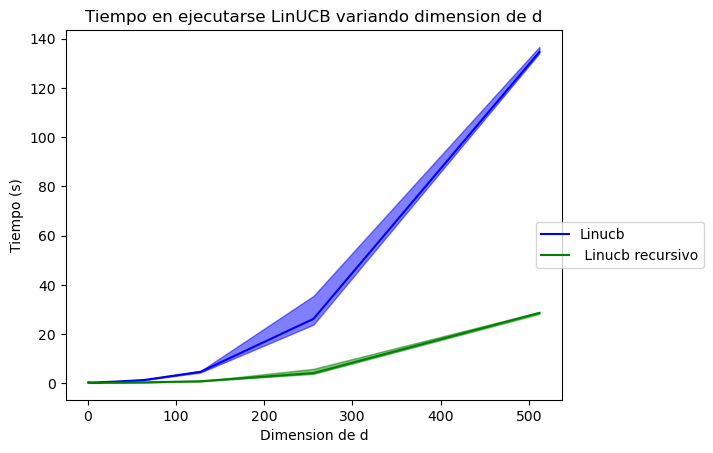

In [6]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(ds, ntime_median_rew,label="Linucb", color='blue')
plt.plot(ds, rTime_g_median_rew,label=" Linucb recursivo", color='green')
ax.fill_between(ds,ntime_sup,ntime_inf, color = 'blue', alpha = transparencia)
ax.fill_between(ds,rTime_g_sup,rTime_g_inf, color = 'green', alpha = transparencia)

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Dimension de d")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo en ejecutarse LinUCB variando dimension de d")
#plt.ylim(0,0.1)
plt.show()

CLinUCB

In [8]:
# Run experiments
rTime              = np.zeros((experimentos,len(ds)))
nTime              = np.zeros((experimentos,len(ds)))
# Run experiments
for j in range(len(ds)):
    print('ds: ' + str(j + 1) + '/' + str(len(ds)))
    for i in    range(experimentos):
        d = ds[j]
        aux1 = np.zeros(d)
        aux1[0]=1
        aux2= np.zeros(d)
        aux2[-1] = 1
        best_theta = [aux1, aux2]
        reward_class = BernoulliFeature(k, d,user_amount, max_prob, noise, best_theta)
        print('exp: ' + str(i + 1) + '/' + str(experimentos))

        linucbg      = CLinUCB(k, iterations, reward_class, d, user_amount, alpha, clusters_amounts, lamb, 500, 500 )
        rlinucbg     = RCLinUCB(k, iterations, reward_class, d, user_amount, alpha, clusters_amounts, lamb, 500, 500 )

        nTime[i,j] = timer()
        linucbg.run()
        nTime[i,j] = timer() - nTime[i,j]

        rTime[i,j] = timer()
        rlinucbg.run()
        rTime[i,j] = timer() - rTime[i,j]

ds: 1/10
exp: 1/10
0/1000
0/1000
exp: 2/10
0/1000
0/1000
exp: 3/10
0/1000
0/1000
exp: 4/10
0/1000
0/1000
exp: 5/10
0/1000
0/1000
exp: 6/10
0/1000
0/1000
exp: 7/10
0/1000
0/1000
exp: 8/10
0/1000
0/1000
exp: 9/10
0/1000
0/1000
exp: 10/10
0/1000
0/1000
ds: 2/10
exp: 1/10
0/1000
0/1000
exp: 2/10
0/1000
0/1000
exp: 3/10
0/1000
0/1000
exp: 4/10
0/1000
0/1000
exp: 5/10
0/1000
0/1000
exp: 6/10
0/1000
0/1000
exp: 7/10
0/1000
0/1000
exp: 8/10
0/1000
0/1000
exp: 9/10
0/1000
0/1000
exp: 10/10
0/1000
0/1000
ds: 3/10
exp: 1/10
0/1000
0/1000
exp: 2/10
0/1000
0/1000
exp: 3/10
0/1000
0/1000
exp: 4/10
0/1000
0/1000
exp: 5/10
0/1000
0/1000
exp: 6/10
0/1000
0/1000
exp: 7/10
0/1000
0/1000
exp: 8/10
0/1000
0/1000
exp: 9/10
0/1000
0/1000
exp: 10/10
0/1000
0/1000
ds: 4/10
exp: 1/10
0/1000
0/1000
exp: 2/10
0/1000
0/1000
exp: 3/10
0/1000
0/1000
exp: 4/10
0/1000
0/1000
exp: 5/10
0/1000
0/1000
exp: 6/10
0/1000
0/1000
exp: 7/10
0/1000
0/1000
exp: 8/10
0/1000
0/1000
exp: 9/10
0/1000
0/1000
exp: 10/10
0/1000
0/1000


In [75]:
ntime_inf            = np.percentile(nTime,inf_percentile ,axis=0)
ntime_median_rew     = np.median(nTime,axis=0)
ntime_sup            = np.percentile(nTime,sup_percentile ,axis=0)

rTime_g_inf            = np.percentile(rTime,inf_percentile ,axis=0)
rTime_g_median_rew     = np.median(rTime,axis=0)
rTime_g_sup            = np.percentile(rTime,sup_percentile ,axis=0)

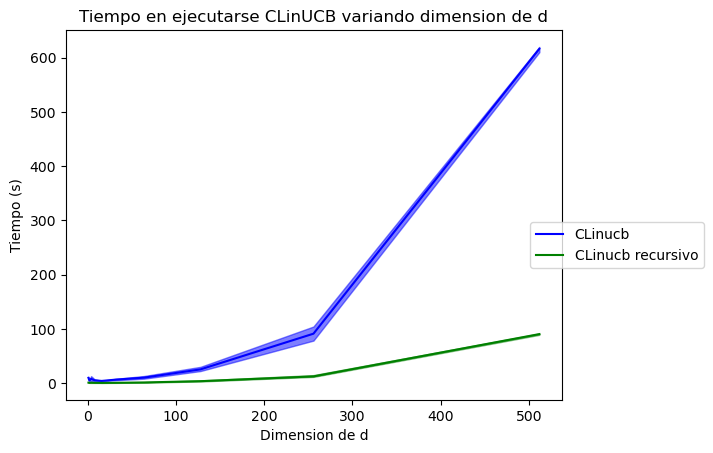

In [76]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(ds, ntime_median_rew,label="CLinucb", color = 'blue')
plt.plot(ds, rTime_g_median_rew,label="CLinucb recursivo", color = 'green')
ax.fill_between(ds,ntime_sup,ntime_inf, color = 'blue', alpha = transparencia)
ax.fill_between(ds,rTime_g_sup,rTime_g_inf, color = 'green', alpha = transparencia)

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Dimension de d")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo en ejecutarse CLinUCB variando dimension de d")
#plt.ylim(0,0.1)
plt.show()